In [114]:
import pandas as pd

In [115]:
animals = pd.read_csv('project1.csv')

In [116]:
animals.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [117]:
#viewing the shape of the dataset
animals.shape

(131165, 12)

In [118]:
#viewing size and types for each 
animals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [119]:
#Part 1 Identify shape, size of the raw data :
#Shape: (131165, 12) so 131,165 rows and 12 columns.
# Size: 131165 × 12 = 1,573,980  cells and 12 mb size

In [120]:
#I noticed that every columns type right now is an object so it must be converted 
#to the approprate types:
# Date of Birth, DateTime and MonthYear should be datetime64
#Age upon Outcome should be a numeric value
#Outcome Type, Outcome Subtype, Animal Type, Sex upon Outcome, Breed, Color should all be category

#counts all duplicate rows.
duplicates = animals.duplicated(subset=["Animal ID"]).sum()
duplicates


9907

In [121]:
# droping duplicates
animals.drop_duplicates(subset=["Animal ID"], keep= "first", inplace=True)

In [122]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121258 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         121258 non-null  object
 1   Date of Birth     121258 non-null  object
 2   Name              84116 non-null   object
 3   DateTime          121258 non-null  object
 4   MonthYear         121258 non-null  object
 5   Outcome Type      121223 non-null  object
 6   Outcome Subtype   62856 non-null   object
 7   Animal Type       121258 non-null  object
 8   Sex upon Outcome  121258 non-null  object
 9   Age upon Outcome  121258 non-null  object
 10  Breed             121258 non-null  object
 11  Color             121258 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [123]:
# To treat invalid name data we want to replace the Nan with "unknown"
animals.isnull().sum()


Animal ID               0
Date of Birth           0
Name                37142
DateTime                0
MonthYear               0
Outcome Type           35
Outcome Subtype     58402
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [124]:
animals['Name'] = animals['Name'].fillna('Unknown')


In [125]:
animals['Outcome Type'] = animals['Outcome Type'].fillna(animals['Outcome Type'].mode()[0])


In [126]:
animals['Outcome Subtype'] = animals['Outcome Subtype'].fillna('Unknown')


In [127]:
#Making sure NA values removed
animals.isnull().sum()


Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [128]:
animals['DateTime'] = pd.to_datetime(animals['DateTime'], format='mixed', errors='coerce', utc=True).dt.tz_localize(None)

animals['Date of Birth'] = pd.to_datetime(animals['Date of Birth'], format='mixed', errors='coerce', utc=True).dt.tz_localize(None)

animals['MonthYear'] = pd.to_datetime(animals['MonthYear'].astype(str), format='%b-%y', errors='coerce')

In [129]:
animals.describe()


,Date of Birth,DateTime,MonthYear
count,121258,121258,121258
mean,2017-07-04 15:41:33.677943040,2019-02-04 09:20:50.263323136,2019-01-19 22:00:16.269442048
min,1991-09-22 00:00:00,2013-10-01 09:31:00,2013-10-01 00:00:00
25%,2014-09-08 00:00:00,2016-04-03 17:34:15,2016-04-01 00:00:00
50%,2017-06-19 00:00:00,2018-10-28 18:04:00,2018-10-01 00:00:00
75%,2020-09-20 00:00:00,2021-12-04 13:41:45,2021-12-01 00:00:00
max,2025-04-28 00:00:00,2025-05-05 07:22:00,2025-05-01 00:00:00


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns


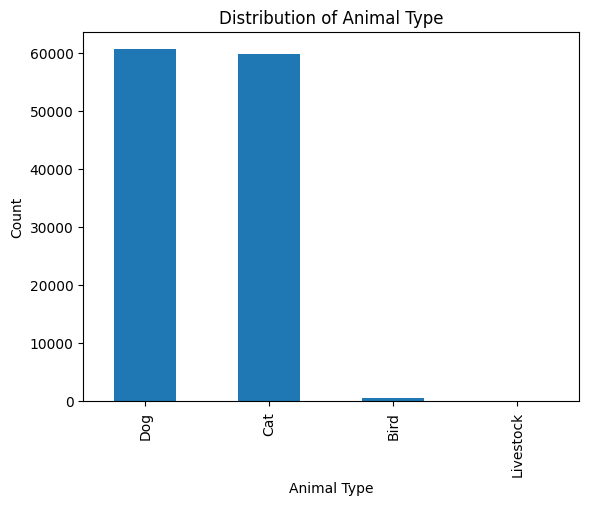

In [131]:
animals['Animal Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

In [132]:
# Dogs and cats dominate the dataset with having over 60,000 records each.
# The other animals (birds and livestock) are very rare in comparison.

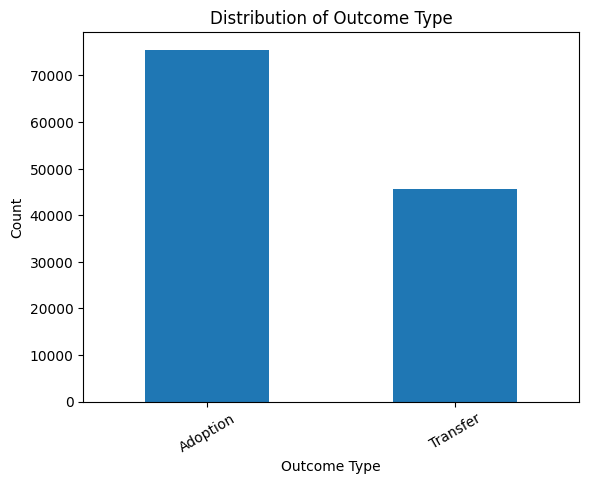

In [133]:
animals['Outcome Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Outcome Type")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

In [134]:
# The majority of outcomes are Adoption, followed by Transfer.
# Again other outcomes (Euthanasia, Return to Owner) are much less frequent.

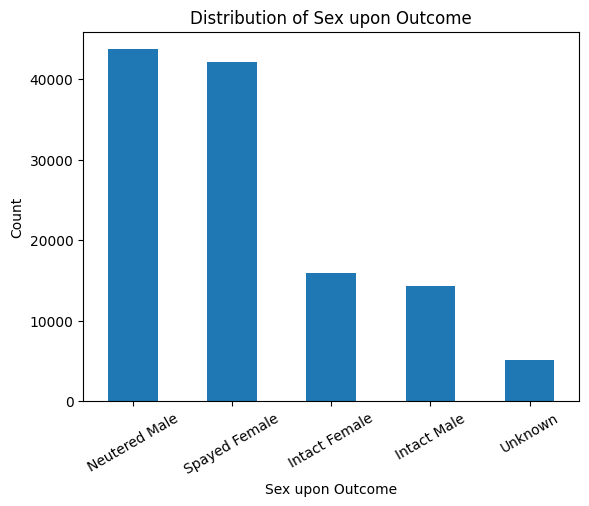

In [135]:
animals['Sex upon Outcome'].value_counts().plot(kind='bar')
plt.title("Distribution of Sex upon Outcome")
plt.xlabel("Sex upon Outcome")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

In [136]:
# The largest categories are Neutered Male and Spayed Female with ~45,000–50,000 animals each.
# Intact animals (male/female) are much less common.
# There are a small number of records are marked as Unknown aswell.

In [137]:
print(animals['Age upon Outcome'].value_counts().head(10))
# The most common age groups are 2 months, 1 year, and 2 years.
# Younger animals (< 1 year) are most prevelant in the dataset, especially “2 months”.
# Because these values are strings we need to convert them into a consistent numeric format (like days) for proper analysis.

Age upon Outcome
2 months    21953
1 year      17666
2 years     16311
3 months     8341
1 month      6485
3 years      5297
4 months     5231
5 months     3459
6 months     3090
4 years      2987
Name: count, dtype: int64


In [138]:
#dropping redundant columns ID and name dont add value and monthyear and date time have redundant info
animals.drop(['Animal ID', 'Name', 'MonthYear'], axis=1, inplace=True)  


In [139]:
#Making sure the values were converted correctly and non-null
animals[['DateTime','Date of Birth']].info()


<class 'pandas.core.frame.DataFrame'>
Index: 121258 entries, 0 to 131164
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DateTime       121258 non-null  datetime64[ns]
 1   Date of Birth  121258 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


In [140]:
animals['AgeNum'] = animals['Age upon Outcome'].str.extract(r'(\d+)').astype(float)
animals['AgeUnit'] = animals['Age upon Outcome'].str.extract(r'([a-zA-Z]+)')

In [141]:
#scale to days
animals.loc[animals['AgeUnit'].str.contains('day', case=False, na=False), 'AgeNum'] *= 1
animals.loc[animals['AgeUnit'].str.contains('week', case=False, na=False), 'AgeNum'] *= 7
animals.loc[animals['AgeUnit'].str.contains('month', case=False, na=False), 'AgeNum'] *= 30
animals.loc[animals['AgeUnit'].str.contains('year', case=False, na=False), 'AgeNum'] *= 365
#drop ageUnit column and rename agenum column 
animals.drop(['Age upon Outcome','AgeUnit'], axis=1, inplace=True)
animals.rename(columns={'AgeNum':'Age upon Outcome (days)'}, inplace=True)

In [142]:
animals['Age upon Outcome (days)'].head()


0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
Name: Age upon Outcome (days), dtype: float64

In [143]:
categorical_cols = ['Outcome Type','Outcome Subtype','Animal Type',
                    'Sex upon Outcome','Breed','Color']
for col in categorical_cols:
    animals[col] = animals[col].astype('category')

In [144]:
#checking types
animals.info()


<class 'pandas.core.frame.DataFrame'>
Index: 121258 entries, 0 to 131164
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date of Birth            121258 non-null  datetime64[ns]
 1   DateTime                 121258 non-null  datetime64[ns]
 2   Outcome Type             121258 non-null  category      
 3   Outcome Subtype          121258 non-null  category      
 4   Animal Type              121258 non-null  category      
 5   Sex upon Outcome         121258 non-null  category      
 6   Breed                    121258 non-null  category      
 7   Color                    121258 non-null  category      
 8   Age upon Outcome (days)  121258 non-null  float64       
dtypes: category(6), datetime64[ns](2), float64(1)
memory usage: 4.7 MB


In [145]:
print(animals['Outcome Type'].head())


0    Transfer
1    Transfer
2    Transfer
3    Transfer
4    Transfer
Name: Outcome Type, dtype: category
Categories (2, object): ['Adoption', 'Transfer']


In [146]:
animals['Outcome Type'].unique()


['Transfer', 'Adoption']
Categories (2, object): ['Adoption', 'Transfer']

In [147]:
animals['OutcomeType_Adoption'] = (animals['Outcome Type'] == 'Adoption').astype(int)

print(animals[['Outcome Type','OutcomeType_Adoption']].head())

  Outcome Type  OutcomeType_Adoption
0     Transfer                     0
1     Transfer                     0
2     Transfer                     0
3     Transfer                     0
4     Transfer                     0


In [148]:

cat_cols = ['Outcome Subtype',
    'Animal Type',
    'Sex upon Outcome',
    'Breed',
    'Color']  
dummies = pd.get_dummies(animals[cat_cols], prefix=cat_cols, dtype='int8')
animals = pd.concat([animals.drop(columns=cat_cols), dummies], axis=1)


In [149]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121258 entries, 0 to 131164
Columns: 3150 entries, Date of Birth to Color_Yellow/Yellow
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), int8(3145)
memory usage: 368.4 MB


In [150]:
#Part 2
#Dropping breed
animals = animals.drop(columns=['Breed'], errors='ignore')


In [151]:
from sklearn.model_selection import train_test_split
import numpy as np
# Some of the code below was generated by ai see [3].
y = animals['Outcome Type']  

# Small numeric/categorical subset for KNN
base_cols = ['Age upon Outcome (days)']  # numeric
keep_prefixes = ['Animal Type_', 'Sex upon Outcome_']  # low-cardinality one-hots only

keep_dummies = [c for c in animals.columns if any(c.startswith(p) for p in keep_prefixes)]

# Exclude columns that give away the target or are non-numeric/huge
leak_or_unused = ['Outcome Type', 'OutcomeType_Adoption', 'Animal ID', 'Name',
                  'DateTime', 'Date of Birth', 'MonthYear', 'Breed'] 

X = animals[base_cols + keep_dummies].copy()
X = X.loc[:, ~X.columns.isin(leak_or_unused)]

X = X.astype(np.float32)
                             
# stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=1
)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Some of the code below was generated by AI; see [4].

#KNN baseline
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN (k=3) classification report:")
print(classification_report(y_test, y_pred_knn, digits=4))
print("Accuracy (test):", accuracy_score(y_test, y_pred_knn))
print("Accuracy (train):", accuracy_score(y_train, knn.predict(X_train)))


KNN (k=3) classification report:
              precision    recall  f1-score   support

    Adoption     0.8550    0.9011    0.8775     22671
    Transfer     0.8204    0.7473    0.7821     13707

    accuracy                         0.8431     36378
   macro avg     0.8377    0.8242    0.8298     36378
weighted avg     0.8420    0.8431    0.8415     36378

Accuracy (test): 0.8431469569520039
Accuracy (train): 0.841258246936852


In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
# Some of the code below was generated by AI; see [1] & [2].

# per course notes
param_grid = {"n_neighbors": np.arange(1, 30)} #reduced to 29 to make it run in a reasonable time
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring="accuracy")
knn_gs.fit(X_train, y_train)

print("Best k:", knn_gs.best_params_)
best_knn = knn_gs.best_estimator_

y_pred_best = best_knn.predict(X_test)
print("\nKNN (GridSearchCV) classification report:")
print(classification_report(y_test, y_pred_best, digits=4))

print("Accuracy (test):", accuracy_score(y_test, y_pred_best))
print("Accuracy (train):", accuracy_score(y_train, best_knn.predict(X_train)))

Best k: {'n_neighbors': 14}

KNN (GridSearchCV) classification report:
              precision    recall  f1-score   support

    Adoption     0.8421    0.9627    0.8984     22671
    Transfer     0.9191    0.7015    0.7957     13707

    accuracy                         0.8643     36378
   macro avg     0.8806    0.8321    0.8471     36378
weighted avg     0.8712    0.8643    0.8597     36378

Accuracy (test): 0.8642861069877399
Accuracy (train): 0.8616988689915175


In [154]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\nLogistic Regression classification report:")
print(classification_report(y_test, y_pred_log, digits=4))




Logistic Regression classification report:
              precision    recall  f1-score   support

    Adoption     0.8477    0.9536    0.8975     22671
    Transfer     0.9032    0.7166    0.7991     13707

    accuracy                         0.8643     36378
   macro avg     0.8754    0.8351    0.8483     36378
weighted avg     0.8686    0.8643    0.8604     36378



In [155]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Some of the code below was generated by AI; see [5].

def row(name, yhat):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, yhat),
        "Precision (macro)": precision_score(y_test, yhat, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, yhat, average='macro', zero_division=0),
        "F1 (macro)": f1_score(y_test, yhat, average='macro', zero_division=0),
    }

results_df = pd.DataFrame([
    row("KNN k=3", y_pred_knn),
    row(f"KNN best k={knn_gs.best_params_['n_neighbors']}", y_pred_best),
    row("Logistic Regression", y_pred_log)
])
print(results_df.round(4))

                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0              KNN k=3    0.8431             0.8377          0.8242   
1        KNN best k=14    0.8643             0.8806          0.8321   
2  Logistic Regression    0.8643             0.8754          0.8351   

   F1 (macro)  
0      0.8298  
1      0.8471  
2      0.8483  
